0.00016913793103448278


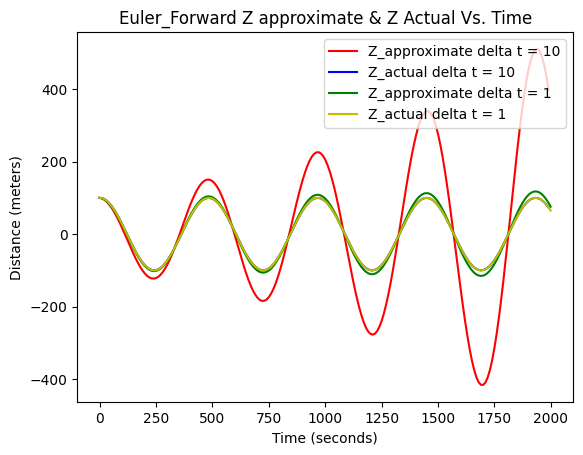

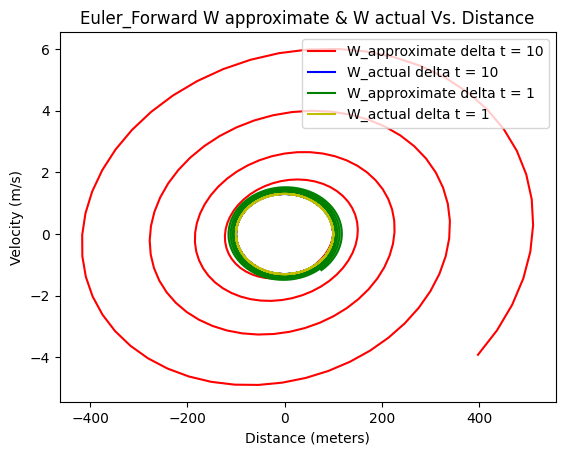

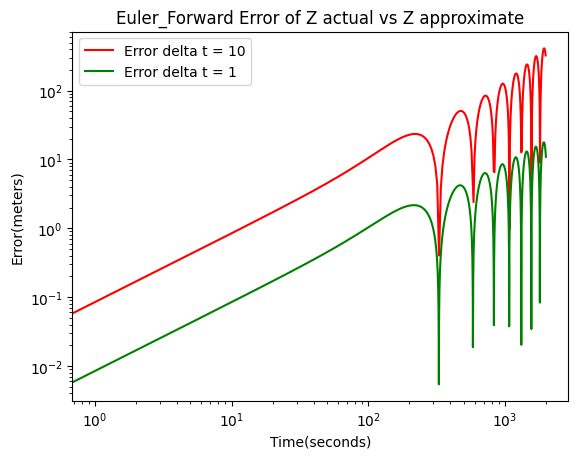

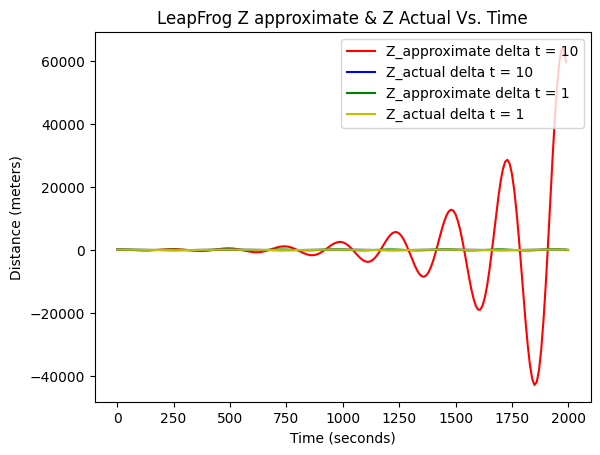

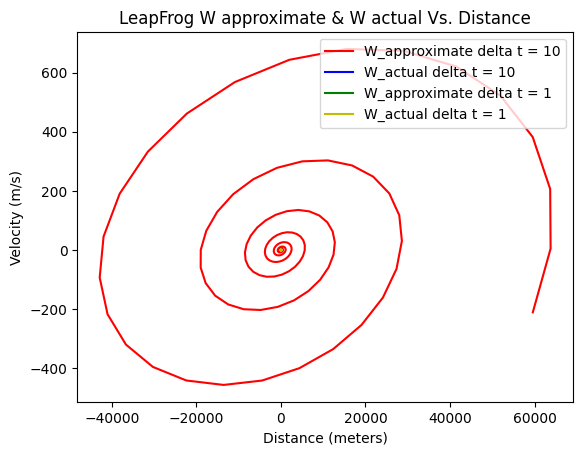

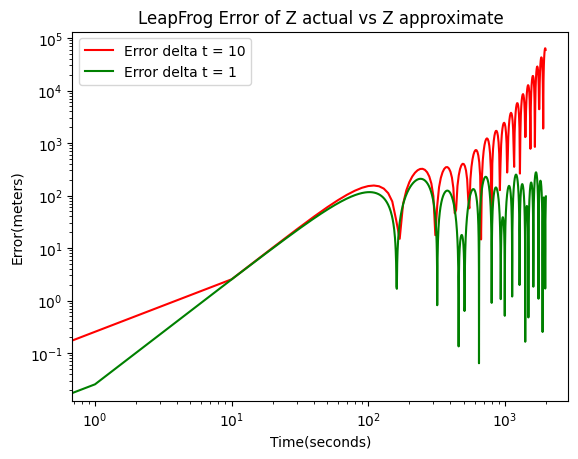

t_delta = 10:
Z output:[100, 98.30862068965517, 94.92586206896551, 89.88033177764565, 83.22924509512484, 75.05794107684764, 65.47891482687531, 54.63037409075837, 42.674336536621354, 29.79429213794927, 16.192462840269847, 2.086699049705455, -12.292940707174534, -26.707874460050405, -40.91488795717217, -54.67016999144377, -67.733426075957, -79.8720022163046, -90.86494920181575, -100.50695766708216, -108.61209518119372, -115.01727880786723, -119.58541992811399, -122.20818259128286, -122.80830220359863, -121.341417900017, -117.79737938157797, -112.20099722589899, -104.61221456723159, -95.12568745548477, -83.86977099045424, -71.00491832897836, -56.72150971333635, -41.237138599750764, -24.79339160635857, -7.652168182511971, 9.908405537297348, 27.598406446538462, 45.12081863453667, 62.17643708591325, 78.46889134624706, 93.70970621380017, 107.6233144880659, 119.95193617964648, 130.4602393968686, 138.93970038319011, 145.21258387212666, 149.13547001492685, 150.60226055809676, 149.54660461704867,

In [2]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np

#Initial Global Variables

g = 9.81 #9.81m/s^2
theta = 290 #290K 
d_theta = 0.005 # d_theta/dz = 5K/km = 5k/1000m = 0.005k/m
z_initial = 100 # z_initial = 100m
t_total = 2000 # 2000 seconds
BV_frequency = np.power(((g/theta)*d_theta), 0.5) # sqrt[(g/θ)dθ/dz] is the Brunt-V ̈ais ̈ala frequency
N_squared = (g/theta)*d_theta # N squared for d^2z/dt^2
print(N_squared)
def Euler_Forward(t_delta):
  z_approx = []
  w_approx = []
  z_actual_array = []
  w_actual_array = []
  err_t = []
  z_next = z_initial # initial position is z_initial
  w_next = 0 # initial velocity is 0
  w_approx.append(w_next) #Appending velocity value at t = 0
  for n in range(0,t_total,t_delta):
    time = n  #calculate time t; range is already in form (0,t_delta*1,t_delta*2,....t_delta*n)
    z_old = z_next
    z_next += w_next * t_delta # z^n+1 = z^n + q(m^n,t^n) where q(m^n,t^n) = w^n * t _delta
    w_next += -N_squared * z_old * t_delta #w^n+1 = w^n + q(m^n,t^n) where q(m^n,t^n) = -N^2 * z_new * t _delta
    z_actual = z_initial*math.cos(BV_frequency*time) #Zp(t)= Zcos(Nt)
    w_actual = -z_initial*math.sin(BV_frequency*time)*BV_frequency #Wp(t) = dz/dt = -Zsin(Nt)*N
    err = abs(z_next - z_actual)
    z_approx.append(z_next) #append z_n+1 to array
    w_approx.append(w_next) #append w_n+1 to array
    z_actual_array.append(z_actual) #Append z_actual to array
    w_actual_array.append(w_actual) #append w_actual to array
    err_t.append(err)
  w_approx.pop()#pop the last value because we appended the first one before the loop
  return z_approx,w_approx,z_actual_array,w_actual_array,err_t

def LeapFrog(t_delta):
  z_approx = []
  w_approx = []
  z_actual_array = []
  w_actual_array = []
  err_t = []
  z_next = z_initial # initial position is z_initial
  w_next = 0 # initial velocity is 0
  z_approx.append(z_next) #Appending distance for iteration 0 leapfrog
  w_approx.append(w_next) #Appending velocity value at t = 0 for iteration 0 leapfrog
  z_old = z_next
  z_next += w_next * t_delta # z^n+1 = z^n + q(m^n,t^n) where q(m^n,t^n) = w^n * t _delta first iteration
  w_next += -N_squared * z_old * t_delta #w^n+1 = w^n + q(m^n,t^n) where q(m^n,t^n) = -N^2 * z_new * t _delta first iteraion
  # z_approx.append(z_next) #Appending distance for iteration 0 leapfrog
  w_approx.append(w_next) #Appending velocity value at t = 0 for iteration 0 leapfrog
  z_actual_array.append(z_initial)#Appending z_initial for 0th iteration
  w_actual_array.append(0) #Appending 0 as w_initial = 0
  err_t.append(0) #Appending 0 as initial error will be 0 since both are initialized at the same distance
  for n in range(t_delta,t_total,t_delta): #skipping 0th iteration so range now is [t_delta:t_total]
    time = n  #calculate time t; range is already in form (0,t_delta*1,t_delta*2,....t_delta*n)
    z_old = z_approx[-1] # F_n-1 of position
    w_old = w_approx[-1] # F_n-1 of velocity
    z_now = z_next
    z_next = z_old + 2*(w_next * t_delta) # z^n+1 = z^n-1 + 2*q(m^n,t^n) where q(m^n,t^n) = w^n * t _delta
    w_next = w_old + 2*(-N_squared * z_now * t_delta) #w^n+1 = w^n-1 + 2q(m^n,t^n) where q(m^n,t^n) = -N^2 * z_new * t _delta
    z_actual = z_initial*math.cos(BV_frequency*time) #Zp(t)= Zcos(Nt)
    w_actual = -z_initial*math.sin(BV_frequency*time)*BV_frequency #Wp(t) = dz/dt = -Zsin(Nt)*N
    err = abs(z_next - z_actual)
    z_approx.append(z_next)
    w_approx.append(w_next)
    z_actual_array.append(z_actual)
    w_actual_array.append(w_actual)
    err_t.append(err)
  w_approx.pop()#pop the last value because we appended the initial one before the loop
  return z_approx,w_approx,z_actual_array,w_actual_array,err_t

def make_plots(integration_method): # takes in function i.e. Euler_Forward or Leap_Frog and creates plots of delta t = 10 and t = 1
  integration_method_name = integration_method.__name__
  t_delta = 10
  z_approx_ten,w_approx_ten,z_actual_ten,w_actual_ten,err_t_ten = integration_method(t_delta)
  t_delta_ten = range(0,t_total,t_delta)
  t_delta = 1
  z_approx_one,w_approx_one,z_actual_one,w_actual_one,err_t_one = integration_method(t_delta)
  t_delta_one = range(0,t_total,t_delta)
  plt.title("{} Z approximate & Z Actual Vs. Time".format(integration_method_name))
  plt.xlabel("Time (seconds)")
  plt.ylabel("Distance (meters)")
  plt.plot(t_delta_ten,z_approx_ten,color = 'r',label = "Z_approximate delta t = 10")
  plt.plot(t_delta_ten,z_actual_ten,color = 'b',label = "Z_actual delta t = 10")
  plt.plot(t_delta_one,z_approx_one,color = 'g',label = "Z_approximate delta t = 1")
  plt.plot(t_delta_one,z_actual_one,color = 'y',label = "Z_actual delta t = 1")
  plt.legend(loc = 'upper right')
  plt.show()

  plt.title("{} W approximate & W actual Vs. Distance".format(integration_method_name))
  plt.xlabel("Distance (meters)")
  plt.ylabel("Velocity (m/s)")
  plt.plot(z_approx_ten,w_approx_ten,color = 'r',label = "W_approximate delta t = 10")
  plt.plot(z_actual_ten,w_actual_ten,color = 'b',label = "W_actual delta t = 10")
  plt.plot(z_approx_one,w_approx_one,color = 'g',label = "W_approximate delta t = 1")
  plt.plot(z_actual_one,w_actual_one,color = 'y',label = "W_actual delta t = 1")
  plt.legend(loc = 'upper right')
  plt.show()

  plt.title("{} Error of Z actual vs Z approximate".format(integration_method_name))
  plt.xlabel("Time(seconds)")
  plt.ylabel("Error(meters)")
  plt.plot(t_delta_ten,err_t_ten,color = 'r',label = "Error delta t = 10")
  plt.plot(t_delta_one,err_t_one,color = 'g',label = "Error delta t = 1")
  plt.xscale('log')
  plt.yscale('log')
  plt.legend(loc = 'upper left')
  
  plt.show()



make_plots(Euler_Forward)
make_plots(LeapFrog)


z_approx,w_approx,z_actual_array,w_actual_array,err_t = Euler_Forward(10)


print("t_delta = 10:")
print("Z output:{}".format(z_approx))
print(z_actual_array)
print("Velocity output:{}".format(w_approx))
print("Velocity actual output:{}".format(w_actual_array))
print("t_delta = 1:")
z_approx,w_approx,z_actual_array,w_actual_array,err_t  = Euler_Forward(1)
print("Z output:{}".format(z_approx))
print(z_actual_array)
print("Velocity output:{}".format(w_approx))
print("Velocity actual output:{}".format(w_actual_array))


z_approx,w_approx,z_actual_array,w_actual_array,err_t = LeapFrog(10)


print("t_delta = 10:")
print("Z output:{}".format(z_approx))
print("Velocity output:{}".format(w_approx))
print("Velocity actual output:{}".format(w_actual_array))
print(z_actual_array)
print("t_delta = 1:")
z_approx,w_approx,z_actual_array,w_actual_array,err_t  = LeapFrog(1)
print("Z output:{}".format(z_approx))
print("Velocity output:{}".format(w_approx))
print("Velocity actual output:{}".format(w_actual_array))
print(z_actual_array)


